In [4]:
!pip install statsmodels==0.13.5
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
import statsmodels.api as sm

1. Gross Domestic Product (GDPA): Measured in billions of dollars, annually, not seasonally adjusted.
2. Population Growth(SPPOPGROWUSA): Measured as a percentage change at an annual rate, annually, not seasonally adjusted.
3. Federal Funds Effective Rate(FEDFUNDS): Measured as a percentage, annually, not seasonally adjusted.
4. Consumer Price Index (CPALTT01USM657N): Measured as a growth rate from the previous period, annually, not seasonally adjusted.
5. Unemployment Level(LNS13100000): Measured in thousands of persons, annually, seasonally adjusted.
6. Personal Saving Rate (PSAVERT): Measured as a percentage, annually, seasonally adjusted.




In [5]:
gdp_df = pd.read_csv(r'GDP_csv.csv')
gdp_df

,Date,GDPA,SPPOPGROWUSA,FEDFUNDS,CPALTT01USM657N,LNS13100000,PSAVERT
0,01-01-1929,104.556,NaN,NaN,NaN,NaN,NaN
1,01-01-1930,92.160,NaN,NaN,NaN,NaN,NaN
2,01-01-1931,77.391,NaN,NaN,NaN,NaN,NaN
3,01-01-1932,59.522,NaN,NaN,NaN,NaN,NaN
4,01-01-1933,57.154,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
90,01-01-2019,21521.395,0.455381,2.158333,0.188682,4845.250000,7.375000
91,01-01-2020,21322.950,0.964348,0.375833,0.113321,10223.333330,15.208333
92,01-01-2021,23594.031,0.156747,0.080000,0.568538,7255.916667,11.108333
93,01-01-2022,25744.108,0.377565,1.683333,0.524139,4881.750000,3.325000


Data Preprocessing: Coverting the date format. Splitting it and extracting only the year

In [6]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Date']).dt.year
gdp_df

,Date,GDPA,SPPOPGROWUSA,FEDFUNDS,CPALTT01USM657N,LNS13100000,PSAVERT,Year
0,01-01-1929,104.556,NaN,NaN,NaN,NaN,NaN,1929
1,01-01-1930,92.160,NaN,NaN,NaN,NaN,NaN,1930
2,01-01-1931,77.391,NaN,NaN,NaN,NaN,NaN,1931
3,01-01-1932,59.522,NaN,NaN,NaN,NaN,NaN,1932
4,01-01-1933,57.154,NaN,NaN,NaN,NaN,NaN,1933
...,...,...,...,...,...,...,...,...
90,01-01-2019,21521.395,0.455381,2.158333,0.188682,4845.250000,7.375000,2019
91,01-01-2020,21322.950,0.964348,0.375833,0.113321,10223.333330,15.208333,2020
92,01-01-2021,23594.031,0.156747,0.080000,0.568538,7255.916667,11.108333,2021
93,01-01-2022,25744.108,0.377565,1.683333,0.524139,4881.750000,3.325000,2022


Data Preprocessing: Removed the Date column.

In [7]:
gdp_df = gdp_df.loc[:,gdp_df.columns != 'Date']
gdp_df


,GDPA,SPPOPGROWUSA,FEDFUNDS,CPALTT01USM657N,LNS13100000,PSAVERT,Year
0,104.556,NaN,NaN,NaN,NaN,NaN,1929
1,92.160,NaN,NaN,NaN,NaN,NaN,1930
2,77.391,NaN,NaN,NaN,NaN,NaN,1931
3,59.522,NaN,NaN,NaN,NaN,NaN,1932
4,57.154,NaN,NaN,NaN,NaN,NaN,1933
...,...,...,...,...,...,...,...
90,21521.395,0.455381,2.158333,0.188682,4845.250000,7.375000,2019
91,21322.950,0.964348,0.375833,0.113321,10223.333330,15.208333,2020
92,23594.031,0.156747,0.080000,0.568538,7255.916667,11.108333,2021
93,25744.108,0.377565,1.683333,0.524139,4881.750000,3.325000,2022


Data Preprocessing: Setting the index to "Year"

In [8]:
gdp_df = gdp_df.set_index('Year')
gdp_df

,GDPA,SPPOPGROWUSA,FEDFUNDS,CPALTT01USM657N,LNS13100000,PSAVERT
Year,,,,,,
1929,104.556,NaN,NaN,NaN,NaN,NaN
1930,92.160,NaN,NaN,NaN,NaN,NaN
1931,77.391,NaN,NaN,NaN,NaN,NaN
1932,59.522,NaN,NaN,NaN,NaN,NaN
1933,57.154,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2019,21521.395,0.455381,2.158333,0.188682,4845.250000,7.375000
2020,21322.950,0.964348,0.375833,0.113321,10223.333330,15.208333
2021,23594.031,0.156747,0.080000,0.568538,7255.916667,11.108333


Data Cleaning: Removing the nulls

In [9]:
gdp_df = gdp_df.dropna()
gdp_df

,GDPA,SPPOPGROWUSA,FEDFUNDS,CPALTT01USM657N,LNS13100000,PSAVERT
Year,,,,,,
1963,637.450,1.439165,3.178333,0.136168,3498.750000,10.733333
1964,684.460,1.389046,3.496667,0.080732,3174.416667,11.591667
1965,742.289,1.250172,4.075000,0.159071,2775.166667,11.441667
1966,813.414,1.154893,5.111667,0.284144,2303.666667,11.158333
1967,859.959,1.088881,4.220000,0.249894,2291.500000,12.325000
1968,940.651,0.998461,5.659167,0.385147,2114.833333,11.333333
1969,1017.615,0.977243,8.204167,0.502436,2139.416667,10.900000
1970,1073.303,1.165003,7.183333,0.452920,3242.666667,12.800000
1971,1164.850,1.264334,4.662500,0.268430,3976.583333,13.475000


Data Visualisation

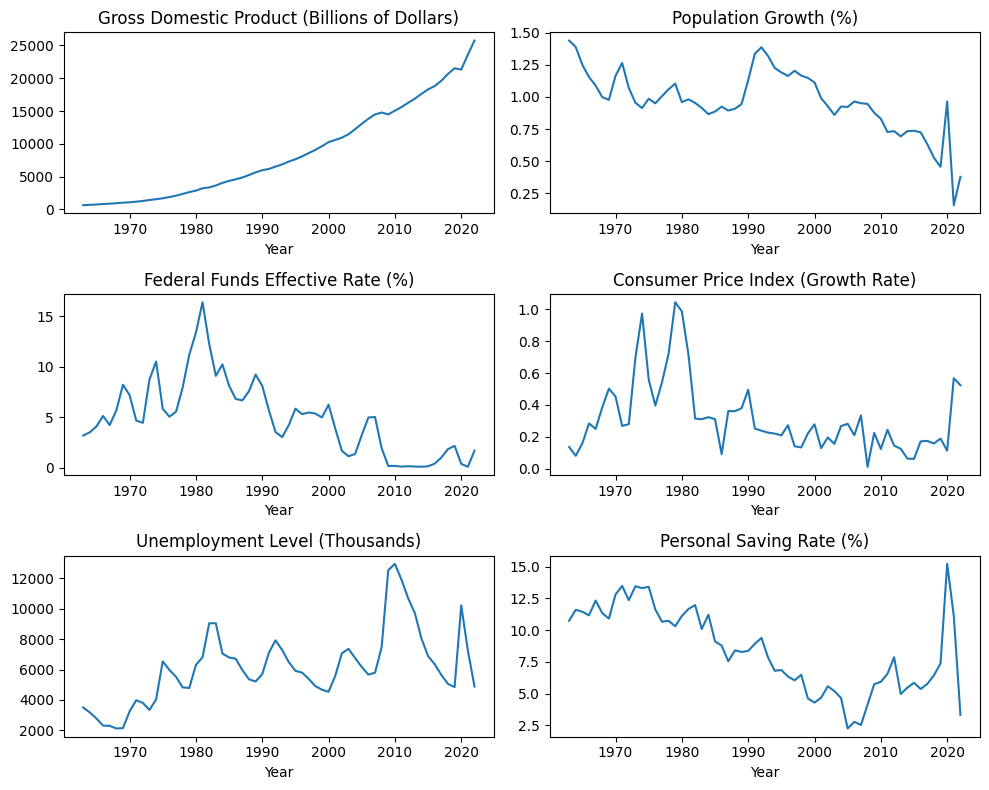

In [10]:
#Create subplots for each variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

# Plot each variable with appropriate labels
gdp_df['GDPA'].plot(ax=axes[0, 0], title='Gross Domestic Product (Billions of Dollars)')
gdp_df['SPPOPGROWUSA'].plot(ax=axes[0, 1], title='Population Growth (%)')
gdp_df['FEDFUNDS'].plot(ax=axes[1, 0], title='Federal Funds Effective Rate (%)')
gdp_df['CPALTT01USM657N'].plot(ax=axes[1, 1], title='Consumer Price Index (Growth Rate)')
gdp_df['LNS13100000'].plot(ax=axes[2, 0], title='Unemployment Level (Thousands)')
gdp_df['PSAVERT'].plot(ax=axes[2, 1], title='Personal Saving Rate (%)')

# Adjust plot layout
plt.tight_layout()
plt.show()

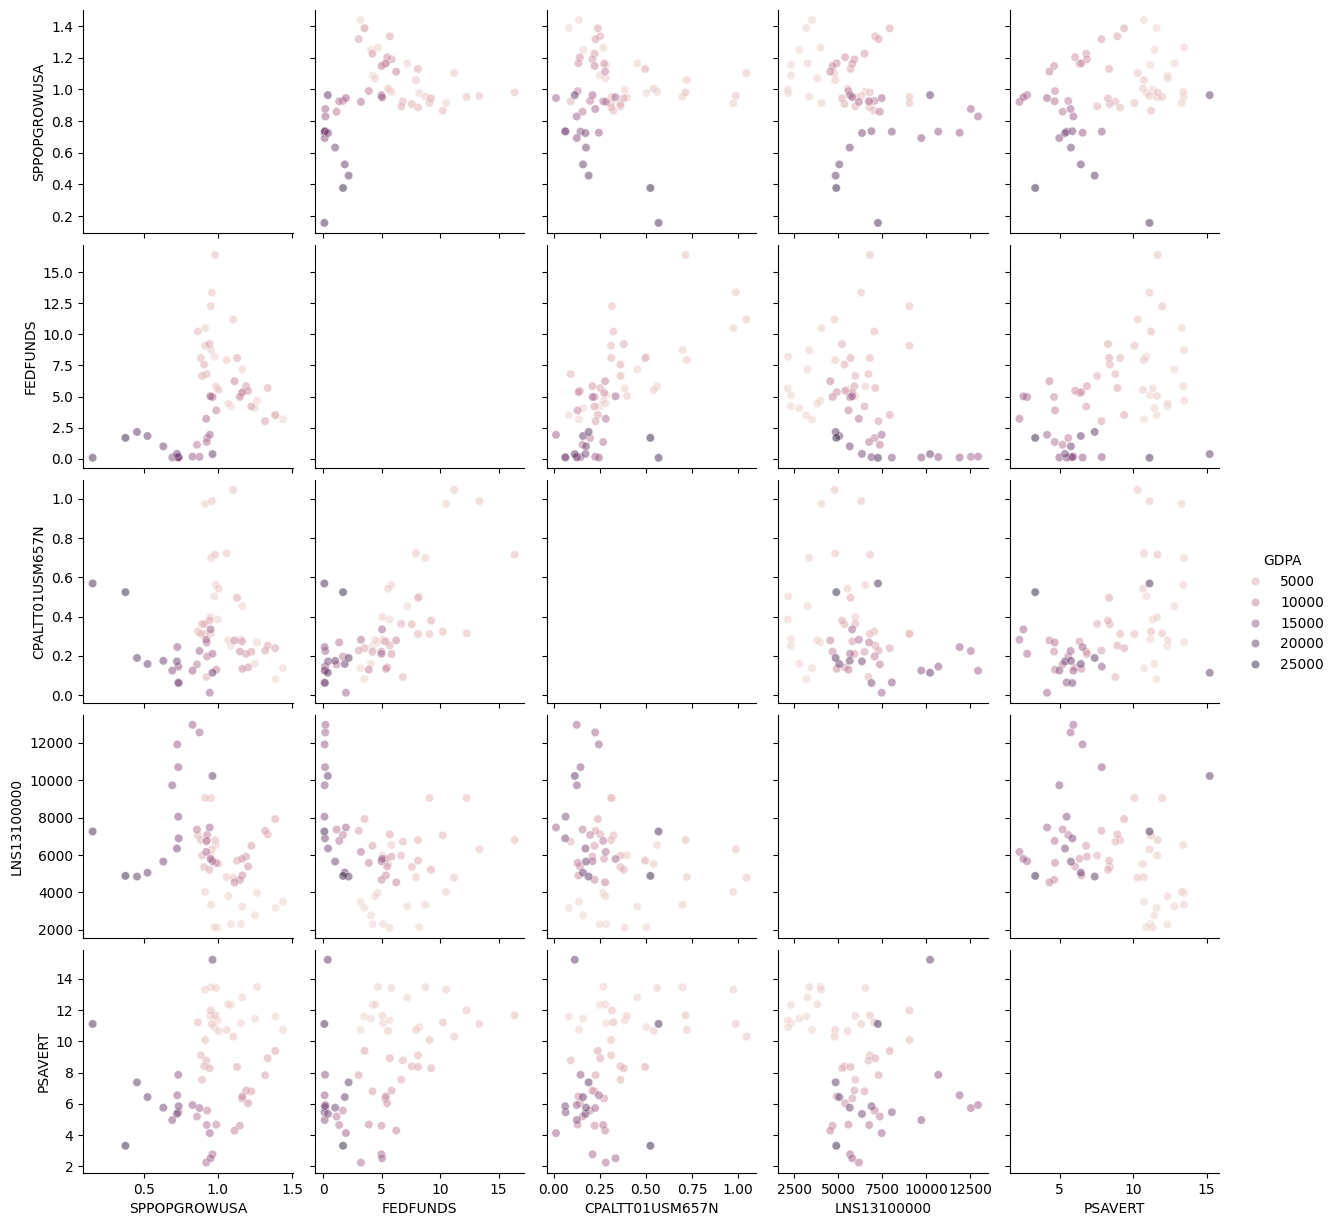

In [11]:
sns.pairplot(gdp_df, hue='GDPA',plot_kws={'alpha':0.5})
plt.show()

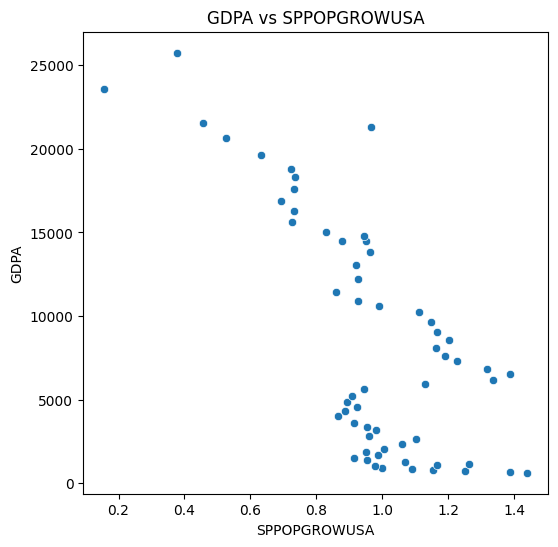

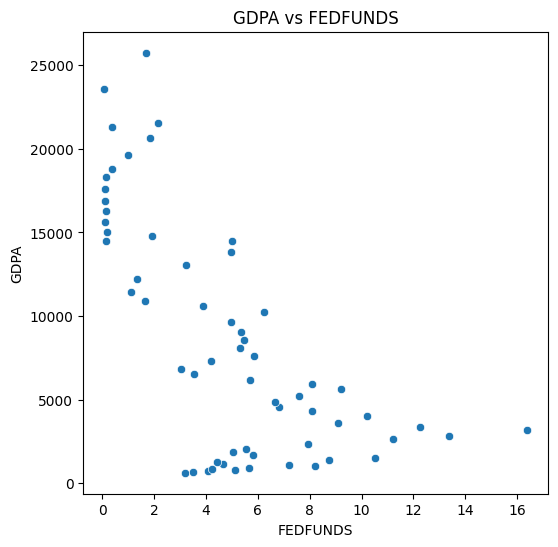

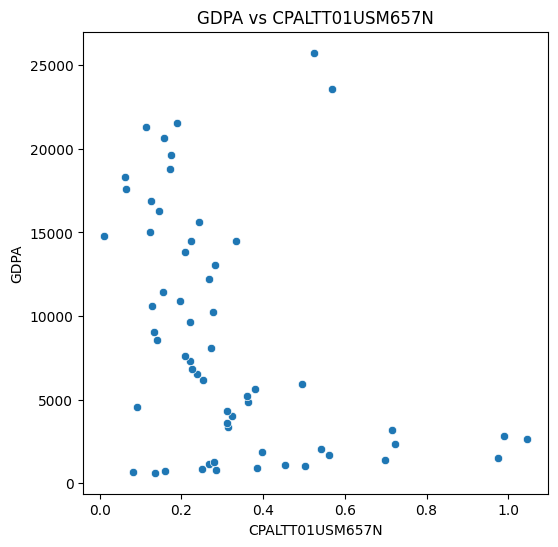

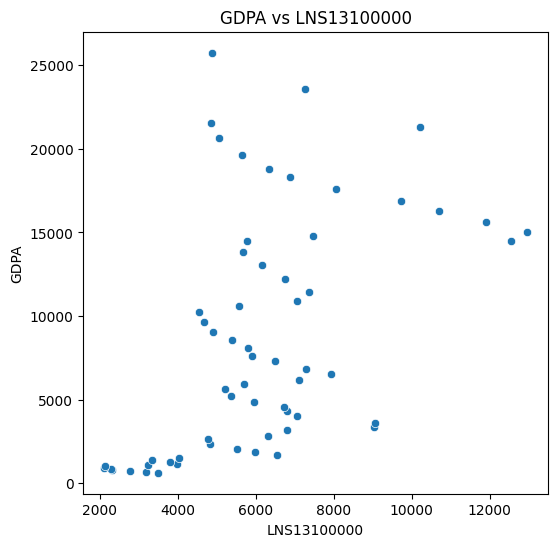

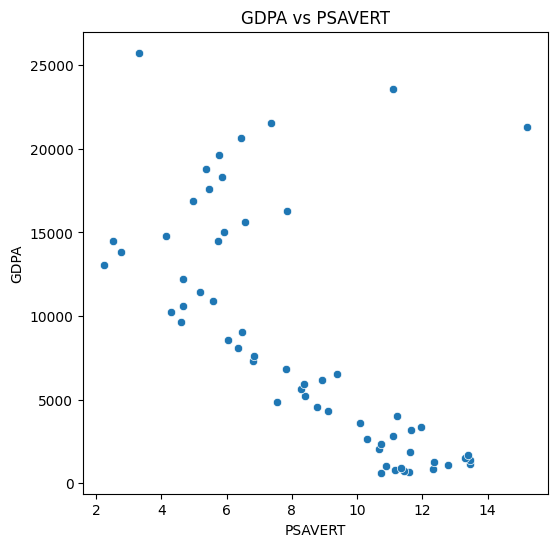

In [12]:
variables = ['SPPOPGROWUSA', 'FEDFUNDS', 'CPALTT01USM657N', 'LNS13100000', 'PSAVERT']

# Create individual scatter plots
for var in variables:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=var, y='GDPA', data=gdp_df)
    plt.title(f'GDPA vs {var}')
    plt.xlabel(var)
    plt.ylabel('GDPA')
    plt.show()

Splitting the data set

In [13]:
X = gdp_df.drop('GDPA', axis =1)
X

,SPPOPGROWUSA,FEDFUNDS,CPALTT01USM657N,LNS13100000,PSAVERT
Year,,,,,
1963,1.439165,3.178333,0.136168,3498.750000,10.733333
1964,1.389046,3.496667,0.080732,3174.416667,11.591667
1965,1.250172,4.075000,0.159071,2775.166667,11.441667
1966,1.154893,5.111667,0.284144,2303.666667,11.158333
1967,1.088881,4.220000,0.249894,2291.500000,12.325000
1968,0.998461,5.659167,0.385147,2114.833333,11.333333
1969,0.977243,8.204167,0.502436,2139.416667,10.900000
1970,1.165003,7.183333,0.452920,3242.666667,12.800000
1971,1.264334,4.662500,0.268430,3976.583333,13.475000


Correlation Plot

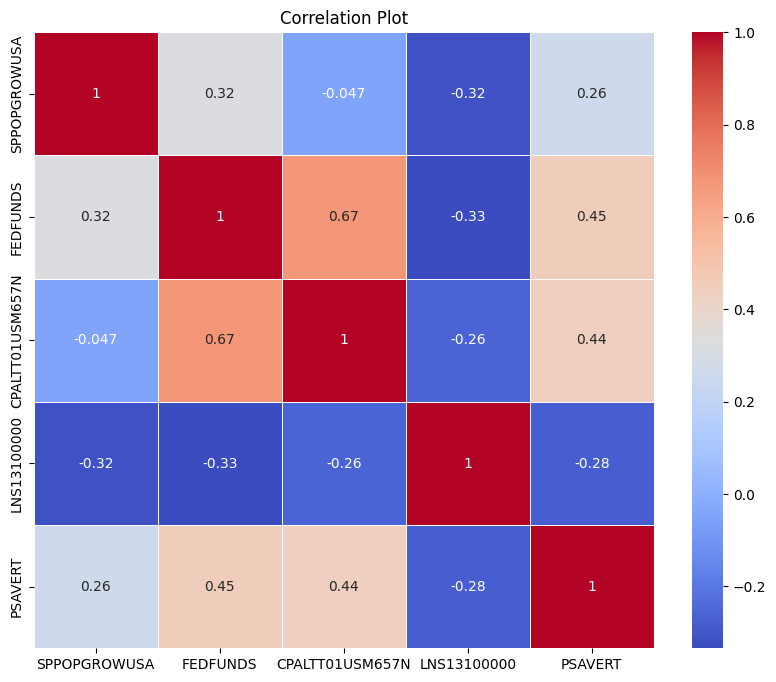

In [14]:
X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths= 0.5)
plt.title('Correlation Plot')
plt.show()


In [15]:
#obtain the traget variable
y = gdp_df['GDPA']
y = pd.to_numeric(y, errors='coerce')
y

,GDPA
Year,
1963,637.450
1964,684.460
1965,742.289
1966,813.414
1967,859.959
1968,940.651
1969,1017.615
1970,1073.303
1971,1164.850


In [16]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1500)

In [17]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LinearRegression()
#train the model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test_scaled)

In [20]:
X_test_scaled

array([[-2.40413464, -0.71795313, -0.63145223, -0.57379739, -0.39701333],
       [-1.58655717, -1.00424843, -0.68918909, -0.27289868, -0.86692394],
       [ 1.15150647, -0.21219228, -0.50437036,  0.04386151, -0.56414649],
       [ 0.79195479, -0.02201629, -0.50066659, -0.63977737, -1.20119025],
       [-3.78150623, -1.23237711,  0.89518784,  0.33121384,  0.68814106],
       [ 0.82217944,  0.01304869, -0.24779012, -1.52795729,  0.70267438],
       [-0.24199735,  0.43217841, -1.0223262 ,  0.12732977,  0.00991957],
       [-0.05709391, -0.02346015, -0.54507591, -0.26476459, -1.73407857],
       [ 0.13439728,  0.11844992,  0.78932062, -0.31904399,  0.5573412 ],
       [ 0.86146845,  0.05925197, -0.29306919, -0.21655447, -0.69736857],
       [-1.10885259, -1.21938244, -1.14398805,  0.19296561, -0.84027953],
       [-0.31655468,  0.6211168 ,  0.06166504, -0.38242731, -0.09908032],
       [ 1.04848852,  0.09926731, -0.82358413, -0.37157143, -0.78456847],
       [ 1.57760288, -0.50405672, -0.4

In [21]:
y_pred

array([16926.13020083, 16592.50995055,  6543.48151147,  7509.66576112,
       21207.15984854,  2623.63871896,  7817.6767492 , 11400.02486797,
        6055.29617899,  6632.8577686 , 16258.75638716,  7206.80781884,
        5959.78420684,  5853.93214352, 10628.63283877,  4167.46304473,
        5225.39918674,  6075.74668081])

In [22]:
#Evaluate our Linear Regression Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test,y_pred)

print(f'R2: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

R2: 0.8618078160763205
MSE: 6393540.978824067
RMSE: 2528.5452297366696
MAE: 2267.886178268638


Plot the actual values vs the predicted values

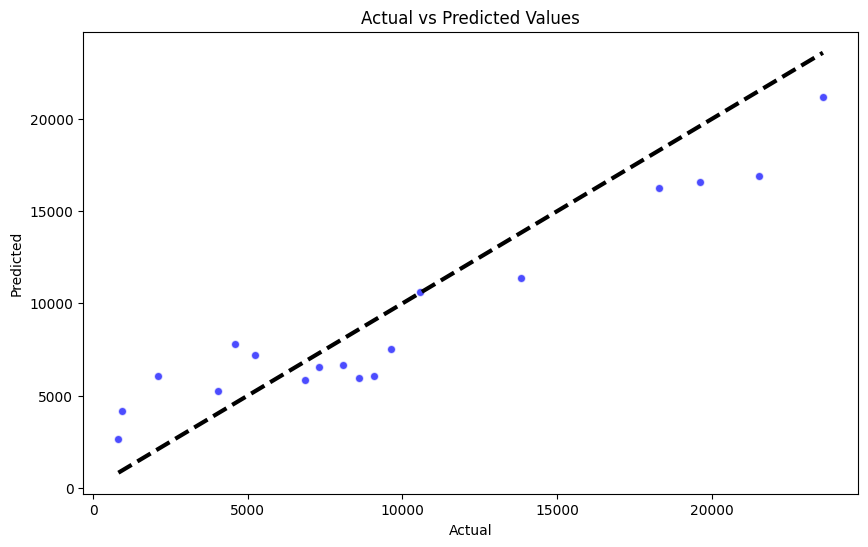

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color ='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

Save the model and scaler to pickle files

In [24]:
model_filename ='linear_regression_model.pkl'
scaler_filename = 'scaler.pkl'

In [25]:
with open(model_filename, 'wb') as model_file:
  pickle.dump(model, model_file)

with open(scaler_filename, 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file )